<a href="https://colab.research.google.com/github/isabelsanttana/IA/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://www.uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="100px"; height="100px">
        </CENTER>    
        <CENTER><b>Estatística para Ciência de Dados</b><br/>
        <CENTER><b>Prof: Erlon Pinheiro</b>
        <CENTER><b>Machine Learning</b></CENTER>
        <CENTER><b>Classificação - Naive Bayes</b><br/></CENTER><br/>

***

## Trabalho de Machine Learning


## Sobre o Projeto

<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://itigic.com/wp-content/uploads/2021/04/20210421_607f9217ed5ec.jpg" alt="vinho" style = width="900px"; height="200px">
        </CENTER>

Para exemplificar o uso do algoritimo Naive-Bayes decidimos implementar um filtro de spam.

### Fonte dos Dados
https://www.kaggle.com/datasets/monizearabadgi/spambase?select=train_data.csv

## Importando o drive e as Bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando bibliotecas a serem utilizadas

import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

## Informações básicas do dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/UVV/Trabalhos/IA/train_data.csv")
teste = pd.read_csv("/content/drive/MyDrive/UVV/Trabalhos/IA/test_features.csv")

In [ ]:
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.0,14.28,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000,0.0,0.000,0.000,0.0,1.800,5,9,True,1947
1,0.0,0.00,1.0,0.0,0.50,0.0,0.0,0.00,0.0,0.50,...,0.357,0.0,0.892,0.000,0.0,2.000,19,172,False,2159
2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.29,0.0,0.43,...,0.124,0.0,0.310,0.062,0.0,1.477,8,65,False,4223
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000,0.0,0.444,0.000,0.0,2.800,7,28,True,2624
4,0.0,0.00,0.0,0.0,1.17,0.0,0.0,0.00,0.0,1.17,...,0.000,0.0,0.000,0.000,0.0,1.551,10,45,True,2743


In [ ]:
dataset.shape

(3680, 59)

In [ ]:
dataset.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
dataset.columns.to_list()

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

## Naive Bayes

In [ ]:
# Dividindo o conjunto de dados em conjuntos de teste e de treinamento
## Configurei a proporcao de 80/20 que é uma proporção mt usada

x, test_X, y, test_Y = train_test_split(dataset.drop(['ham'],axis=1),dataset['ham'], train_size = 0.8, test_size=0.2, random_state=0)

In [ ]:
# Dic com os resultados dos modelos

resultados = {'Modelo': [],'Precisão': [] }

### Multinomial

In [ ]:
# Multinomial 

multi = MultinomialNB()

# inicio do treinamento, # tabela de probabilidade onde x - atributos previsores e y - respostas esperadas
multi = multi.fit(x,y) 

# descobrindo a 'Accuracy' (precisão)
multiScore = multi.score(test_X, test_Y)

# adicionando o resultado no dic 
resultados['Modelo'].append("Multinomial")
resultados["Precisão"].append(multiScore)

print(f'Modelo: Multinomial\nPrecisão: {multiScore}\n')

Modelo: Multinomial
Precisão: 0.6847826086956522



In [ ]:
multi.classes_

array([False,  True])

**Previsão de Spam**

Vamos usar algumas linhas do Dataset 'Teste' para fazer algumas previsões em nossos modelos.

In [ ]:
teste.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
0,0.0,0.0,0.17,0.52,0.17,0.0,0.17,0.0,0.69,0.17,...,0.0,0.072,0.0,0.754,0.681,0.0,4.740,52,967,1351
1,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.142,3,16,1687


In [ ]:
# Previsão de spam

previsão = multi.predict(teste[:1])
previsão ## não é spam

array([False])

In [ ]:
previsão = multi.predict(teste[1:2])
previsão ## é spam

array([ True])

### Bernoulli

In [ ]:
# Bernoulli 

ber = BernoulliNB()

# inicio do treinamento, tabela de probabilidade onde x - atributos previsores e y - respostas esperadas
ber = ber.fit(x, y)

# descobrindo a 'Accuracy' (precisão)
berScore = ber.score(test_X, test_Y)

# adicionando o resultado no dic 
resultados['Modelo'].append("Bernoulli")
resultados["Precisão"].append(berScore)

print(f'Modelo: Bernoulli\nPrecisão: {berScore}\n')

Modelo: Bernoulli
Precisão: 0.8668478260869565



In [ ]:
teste.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
0,0.0,0.0,0.17,0.52,0.17,0.0,0.17,0.0,0.69,0.17,...,0.0,0.072,0.0,0.754,0.681,0.0,4.740,52,967,1351
1,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.142,3,16,1687


In [ ]:
# Previsão de spam

previsão = ber.predict(teste[:1])
previsão

array([False])

In [ ]:
previsão = ber.predict(teste[1:2])
previsão

array([ True])

### Gaussian

In [ ]:
# Gaussian 

gaussian = GaussianNB()

# inicio do treinamento, tabela de probabilidade onde x - atributos previsores e y - respostas esperadas
gaussian = gaussian.fit(x,y)

# descobrindo a 'Accuracy' (precisão)
gaussianScore = gaussian.score(test_X, test_Y)

# adicionando o resultado no dic 
resultados['Modelo'].append("Gaussian")
resultados["Precisão"].append(gaussianScore)

print(f'Modelo: Gaussian\nPrecisão: {gaussianScore}')

Modelo: Gaussian
Precisão: 0.7975543478260869


**Probabilidade A Priori**

Probabilidade atribuída a um ou mais eventos antes da obtenção de informações experimentais ou amostrais, ou seja, independente da realização do experimento.

In [ ]:
# probabilidades a priori

gaussian.class_prior_ # 39% False, 60% True

array([0.39232337, 0.60767663])

In [ ]:
teste.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
0,0.0,0.0,0.17,0.52,0.17,0.0,0.17,0.0,0.69,0.17,...,0.0,0.072,0.0,0.754,0.681,0.0,4.740,52,967,1351
1,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.142,3,16,1687


In [ ]:
# Previsão de spam

previsão = gaussian.predict(teste[:1])
previsão

array([False])

In [ ]:
previsão = gaussian.predict(teste[1:2])
previsão

array([ True])

## Comparando resultados

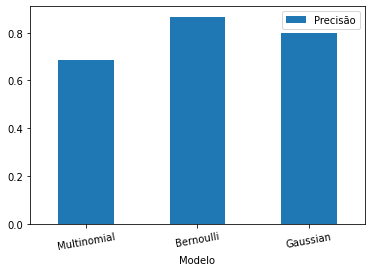

In [ ]:
# Plotando os resultados 
## o resultado do modelo Bernoulli teve mais precisão, foi a q mais se adequou aos nossos dados

data = pd.DataFrame.from_dict(resultados)
data.plot.bar(x = 'Modelo', y = 'Precisão', rot = 10)